In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
x_train, x_test = x_train/255.0, x_test/255.0

In [0]:
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)

In [0]:
labels = ["T_shirt","Trouser","Pullover","Dress","Coat",
          "Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

In [0]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),

   tf.keras.layers.Dense(1024,activation=tf.nn.relu),
   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer='adam', 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [0]:
n_epochs=20
n_batch=128

In [0]:
t = time.process_time()
H = model.fit(x_train,ytrain, validation_data=(x_test,ytest),
              epochs=n_epochs, batch_size=n_batch)
print("elapsed_time = ", time.process_time() - t)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4958 - accuracy: 0.8249 - val_loss: 0.4066 - val_accuracy: 0.8547
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3649 - accuracy: 0.8689 - val_loss: 0.3774 - val_accuracy: 0.8641
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.8812 - val_loss: 0.3996 - val_accuracy: 0.8560
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2982 - accuracy: 0.8891 - val_loss: 0.3382 - val_accuracy: 0.8787
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2835 - accuracy: 0.8948 - val_loss: 0.3498 - val_accuracy: 0.8697
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.9008 - val_loss: 0.3560 - val_accuracy: 0.8728
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2524 - accuracy: 0.9054 - val_loss: 0.3239 - val_accuracy: 0.8846
Epoch 

In [0]:
predictions = model.predict(x_test, batch_size=n_batch)

In [0]:
print(classification_report(ytest.argmax(axis=1), 
      predictions.argmax(axis=1),target_names=labels))

              precision    recall  f1-score   support

     T_shirt       0.85      0.86      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.74      0.79      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.77      0.87      0.82      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.73      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle_boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



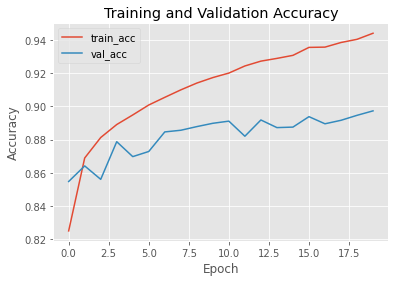

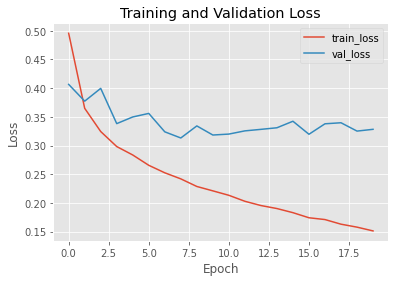

In [0]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()